# Project 2 Suho Lee

# Scientific question:
## Would endometrial cancer cells have different expression of estrogen receptor coregulator genes, FOXA1 and GATA3, than breast cancer cells? Also, would they respond differently to estrogen through their unique cellular pathways?

FOXA1 and GATA3 are protein coding genes that encode transcription factors for chromatin accessibility at many of the estrogen receptor’s genomic binding sites. In either breast cancer cells or endometrial cancer cells, these coregulator genes are highly expressed in order to promote the proliferation and/or migration of cancer cells by enhancing estrogen receptor-estrogen-mediated transcription (Keda et al., 2015).
However, these coregulators somehow are differentially expressed between endometrial and breast tumors (Baxter et al., 2019). This questions us if the expressions of these genes contribute to unique cellular pathways.

# Scientific hypothesis:
## If FOXA1 and GATA3 ER-responsive genes are differentially expressed in endometrial cancer cells compared to breast cancer cells, then endometrial cancer cells would have unique cellular pathways to respond to estrogen.



FOXA1 and GATA3 sequence data was collected by a fasta file from NCBI and then was read in the notebook for pairwise sequence alignment, the first bioinformatic method in this notebook.
I will use pairwise sequence alignment to see or compare the relationships between the three coregulator genes. To visualize the sequences, I will use sequence logos in order to depict sequence characteristics.

Endometrial and breast cancer cell data were identified from NCBI (GEO) and saved to a csv file. The expression of FOXA1 and GATA3 genes were then obtained through RNA seq analysis. In order to know the cellular pathways from the cells, the RNA seq data is used to visualize the pathways.

# Loading in Packages
## Packages were loaded:

Pandas: a software library written for the Python programming language for data manipulation and analysis. https://en.wikipedia.org/wiki/Pandas_(software)

Numpy; an open-source numerical Python library. NumPy contains a multi-dimensional array and matrix data structures. https://medium.com/fintechexplained/why-should-we-use-numpy-c14a4fb03ee9

matplotlib: a library for creating static, animated, and interactive visualizations in Python

scipy: a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. https://docs.scipy.org/doc/scipy/tutorial/general.html

Reactome: pathway analysis database to see specific cellular pathways 

Logomaker: Makes sequence logos to visual the differences in the two sequences

gseapy: used for RNA-seq for convenient GO enrichment and to produce publication quality figures in python.https://github.com/zqfang/GSEApy

rpy2: an interface to R running embedded in a Python process

bioinfokit: aimed to provide various easy-to-use functionalities to analyze, visualize, and interpret the biological data generated from genome-scale omics experiments.https://pypi.org/project/bioinfokit/0.3/

In [287]:
pip install rpy2

Note: you may need to restart the kernel to use updated packages.


In [288]:
pip install bioinfokit

Note: you may need to restart the kernel to use updated packages.


In [289]:
pip install logomaker

Note: you may need to restart the kernel to use updated packages.


In [313]:
pip install gseapy

  Created wheel for bioservices: filename=bioservices-1.8.4-py3-none-any.whl size=231822 sha256=c1ed5dab2fb21749ec89591f9ce2300f2bee557a1a1a0091214efb3f6c39e78b
  Stored in directory: c:\users\suho\appdata\local\pip\cache\wheels\a4\c0\22\364872733199d56b14079397eebe49e6672a025f44932208c6
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=a930bedc7936a058460bf848bec90f2b055d7749a89d0d6807a5684c7342f4d8
  Stored in directory: c:\users\suho\appdata\local\pip\cache\wheels\91\1a\c5\9dfcc86c5bb27991b4dd27741dd03847dfca83ce975c186ddb
Successfully built bioservices easydev
Note: you may need to restart the kernel to use updated packages.


In [359]:
#correctly import packages
#Includes downloading packages as seen above.
import pandas as pd
import collections
import numpy as np
from scipy import stats
from Bio import pairwise2
from Bio.Seq import Seq
from Bio import SeqIO
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import logomaker as lm


# Pairwise sequence alignment and sequence logos analysis
Used fasta file from NCBI. fasta file contains the DNA sequence (nucleotide) of certain gene. FOXA1 and GATA3 gene sequences are aligned and compared by using Pairwise sequence alignment function. I first compared by aligning the two genes. Then, I used sequence logos to visualize what is conserved between FOXA1 and GATA3 gene. 

In [329]:
# Creating sample sequences
FOXA1 = SeqIO.read("FOXA1.fasta", "fasta")
GATA3 = SeqIO.read("GATA3.fasta", "fasta")
  
# Finding similarities
alignments = pairwise2.align.globalxx(FOXA1, GATA3)
  
# Showing results
for match in alignments:
    print(match)


Alignment(seqA="ID: NC_000014-.9--:c3759---5249---3--758-9552-\nName: NC_000014-.9--:c3759---5249---3--758-9552-\nDescription: NC_000014-.9--:c3759---5249---3--758-9552- FOX-A1--- [organism=Homo sapiens] [GeneID=31-69--] [chromosome=14-]\nNumber of features: 0\nSeq('AGA-GGCAGC--C-C-GC-T--CACTT-C--CCG--CGGAGGCGC-TCC-CCGGCGCCGC-GCTCCGC-GG--...CA-A')", seqB="ID: NC_00001-0.-11:-----8045-4-20--8075-19---8\nName: NC_00001-0.-11:-----8045-4-20--8075-19---8\nDescription: NC_00001-0.-11:-----8045-4-20--8075-19---8 ---GA-TA3 [organism=Homo sapiens] [GeneID=--26-25] [chromosome=1-0]\nNumber of features: 0\nSeq('AG-TGGC-G-AACTCTGCCTGTCA-TTTCTGCC-TTC--A---G-AT-CTCCGG-G-CG-AG-T---CAGGAA...C-TA')", score=195.0, start=0, end=329)
Alignment(seqA="ID: NC_000014.9--:c3759---5249---3--758-9552-\nName: NC_000014-.9--:c3759---5249---3--758-9552-\nDescription: NC_000014-.9--:c3759---5249---3--758-9552- FOX-A1--- [organism=Homo sapiens] [GeneID=31-69--] [chromosome=14-]\nNumber of features: 0\nSeq('AGA-GGCAG

In [346]:
FOXA1_df = pd.read_csv('FOXA1.fasta', comment='>', names=['position'])
FOXA1_df.head()

FOXA1_list = FOXA1_df['position'].values
FOXA1_list[:10]

array(['AGAGGCAGCCCGCTCACTTCCCGCGGAGGCGCTCCCCGGCGCCGCGCTCCGCGGCAGCCGCCTGCCCCCG',
       'GCGCTGCCCCCGCCCGCCGCGCCGCCGCCGCCGCCGCGCACGCCGCGCCCCGCAGCTCTGGGCTTCCTCT',
       'TCGCCCGGGTGGCGTTGGGCCCGCGCGGGCGCTCGGGTGACTGCAGCTGCTCAGCTCCCCTCCCCCGCCC',
       'CGCGCCGCGCGGCCGCCCGTCGCTTCGCACAGGGCTGGATGGTTGTATTGGGCAGGGTGGCTCCAGGATG',
       'TTAGGAACTGTGAAGATGGAAGGGCATGAAACCAGCGACTGGAACAGCTACTACGCAGACACGCAGGAGG',
       'TGAGAGGCAAGGCGAGGCGGGCGGCCGGTGGGGCGCCGCTGGAGCCCGTGCCGGGGGAGGCCGGGGAGCG',
       'GTGGGCGCCAGGCAAGGCAGGCAGGCGGGCCGGGGGCGCCTTCTCGGTGCCACCGCTGCCCGCCCGCCGG',
       'TGTGGCCCCGGCCGGGCCTTGGCCGGGCCTGGAAGCGGGACCTGCTGCCCTGCTCTGTCCCGACTCTCGC',
       'AGCCGGAGAGGGAGTTTTAGGAAACTCCGGGCTTTGAAAACAGCGGCTCTAGGAAGCGCTTGCCTCTTCC',
       'CAGCAGCGAGCGGGAGCAGGAGCCGGGCCCGGGGTGCAGCGGGCGGGCGAGCGCCGGTGCGAGTTGGAAG'],
      dtype=object)

In [331]:
GATA3_df = pd.read_csv('GATA3.fasta', comment='>', names=['position'])
GATA3_df.head()
GATA3_list = GATA3_df['position'].values
GATA3_list[:10]

array(['AGTGGCGAACTCTGCCTGTCATTTCTGCCTTCAGATCTCCGGGCGAGTCAGGAAAAAAAATAAAAAACAG',
       'CTGGCCCTCGGGAGCGAGCTGCCCAGGTCAGTGAATATCACTCTCTTCCCTCTCTAACTCCGCACTCCCT',
       'CTGCCCGCTCCACGTGGAGAGAATTAGGAGGAGGCCTCCTCTCCAAAGGGCAGACTCCCTCTGAAAGAAA',
       'CTAAACTAGAACCCAGTTCTTATTGTTCTTTTTGGTCACTGGAAATCTCTGGGTTTCTGTGGTGACCTTG',
       'GGCGGGTACGGTGTGTGAGTGTGTGGATGTCCTCGTTTGCAGGAAAGAGCTGGTAGAAGTAGGGATGTGA',
       'AGAAAAACCCAACGGAAGAATGAGAGCCCGTGGGAATGCTTGGAAAGGGCCGGAGACACGTTTCCCACTG',
       'CAAGGAGGGCAGAGGATTGGGGAAAACAACCCCTGTGCCCAGGAGCCTTCTTCTAAAGGTGGCTTCAGTG',
       'TCAATTTCATGTTTATTTTCCTCTGTTTAAAGGTGTGTGTTGAGGCTCATTGTCTCTGCATATAATTAAA',
       'GAAACAGCTCTGCTCTGTAAGATAAAGTTGGAACCCAGATGTGTCTGCATCTGGCATACCCCCGGGAAGC',
       'TAGGGGTCCGGAGGCTTCTTTGCTTCCAGGAGCACCCTGAGGTGGGTGAGAAAACCGCAGCCTCCCCAGA'],
      dtype=object)

RuntimeError: In affine_transform: Invalid vertices array.

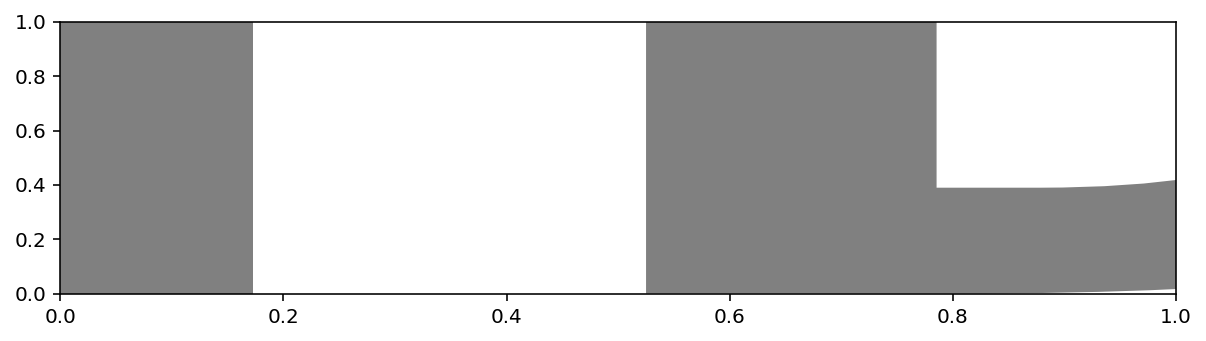

In [356]:
X = FOXA1
Y= GATA3
Genes_align = pairwise2.align.globalms(X, Y, 2, -1, -1, -.1)[0]

FG_align=lm.alignment_to_matrix(sequences=list(Genes_align[:2]), to_type='counts')
FG_logo = lm.Logo(FG_align)
FG_logo.ax.set_xlim([250,300])

# RNA seq analysis
Csv file is a plain text file that contains a list of data. I used a csv file which contains the GEO dataset of endometrial and breast cancer cells. In order to compare the expression of FOXA1 and GATA3 genes, I first read the csv files, parse the pandas dataframe, and calculate the sums of each endometrial and breast cancer cells of all gene expression. Then, I calculated the FPKM, Fragments Per Kilobase Million which shows the abundance of the genes. I will then sort out the FOXA1 and GATA3 genes and compare FPKM to determine the amount of expression between the two cancer cells.

In [320]:
# Processing the counts data 
# Read in the csv file
counts_raw = pd.read_csv('GEO data.csv')
print(counts_raw.head())

metadata = pd.read_csv('GEO metadata2.csv')
# Set the index to the id 
metadata = metadata.set_index('id')
print(metadata)
print(counts_processed.head)
# parse the pandas dataframe just for the Endometrial cancer cells and sum up all for each gene
Endometrial_exp = list(metadata.loc[metadata['Symbol'] == 'Endometrial'].index)
print(Endometrial_exp)

# parse the pandas dataframe just for the Breast cancer cells
Breast_exp = list(metadata.loc[metadata['Symbol'] == 'Breast'].index)
print(Breast_exp)

# Return a column to the pandas dataframe that has the sum of the reads for each gene
# under each of the experimental conditions (Sum Endometrial) or (Sum Breast)
counts_raw['Sum Endometrial'] = counts_raw[Endometrial_exp].sum(axis=1)
counts_raw['Sum Breast'] = counts_raw[Breast_exp].sum(axis=1)

# Also calculate the mean and standard deviation 
counts_raw['Mean Endometrial'] = counts_raw[Endometrial_exp].mean(axis=1)
counts_raw['Mean Breast'] = counts_raw[Breast_exp].mean(axis=1)

counts_raw['STD Endometrial'] = counts_raw[Endometrial_exp].std(axis=1)
counts_raw['STD Breast'] = counts_raw[Breast_exp].std(axis=1)
print(counts_raw.head())

   Accession  Symbol  Endometrial_1  Endometrial_2  Endometrial_3  \
0  NM_000014     A2M       0.080530       0.125777       0.067772   
1  NM_000015    NAT2       0.080530       0.100622       0.045181   
2  NM_000016   ACADM      14.924967      16.351066      21.483629   
3  NM_000017   ACADS       6.066623       2.113061       4.834381   
4  NM_000018  ACADVL      35.433375      25.004554      32.937047   

   Endometrial_4  Endometrial_5  Endometrial_6  Endometrial_7    Breast_1  \
0       0.142534       5.478546       4.906817       5.423983    5.411875   
1       0.118779       0.082178       0.084600       0.080554    0.000000   
2      16.082623      13.285474      13.225845      14.204392   15.519656   
3       2.138015       3.341913       2.538009       2.658289    2.590119   
4      23.280607     121.075870     121.852619     109.795383  140.098063   

    Breast_2   Breast_3   Breast_4  
0   0.266498   0.091893   0.226979  
1   0.000000   0.022973   0.000000  
2   7.16880

In [321]:
# Add a row that has the sum of each column to the dataframe
Sum_Dict = {'Accession': 'total Column Count',
            'Endometrial_1': counts_raw['Endometrial_1'].sum(),
            'Endometrial_2': counts_raw['Endometrial_2'].sum(), 
            'Endometrial_3': counts_raw['Endometrial_3'].sum(), 
            'Endometrial_4': counts_raw['Endometrial_4'].sum(), 
            'Endometrial_5': counts_raw['Endometrial_5'].sum(),
            'Endometrial_6': counts_raw['Endometrial_6'].sum(),
            'Endometrial_7': counts_raw['Endometrial_7'].sum(),
            'Breast_1': counts_raw['Breast_1'].sum(),
            'Breast_2': counts_raw['Breast_2'].sum(),
            'Breast_3': counts_raw['Breast_3'].sum(),
            'Breast_4': counts_raw['Breast_4'].sum(),
            'Sum Endometrial': counts_raw['Sum Endometrial'].sum(),
            'Sum Breast': counts_raw['Sum Breast'].sum()
           }

counts_raw = counts_raw.append(Sum_Dict, ignore_index = True)

# change the index to the gene id
counts_raw = counts_raw.set_index('Accession')
print(counts_raw)

                    Symbol  Endometrial_1  Endometrial_2  Endometrial_3  \
Accession                                                                 
NM_000014              A2M   8.053040e-02       0.125777   6.777170e-02   
NM_000015             NAT2   8.053040e-02       0.100622   4.518113e-02   
NM_000016            ACADM   1.492497e+01      16.351066   2.148363e+01   
NM_000017            ACADS   6.066623e+00       2.113061   4.834381e+00   
NM_000018           ACADVL   3.543337e+01      25.004554   3.293705e+01   
...                    ...            ...            ...            ...   
NR_135486              NaN   2.131371e+01      36.777321   2.423968e+01   
NR_135490              NaN   3.473544e+01      33.507108   3.390844e+01   
NR_135491              NaN   2.684347e-01       0.628887   2.484962e-01   
NR_135492              NaN   4.794243e+01      12.150100   4.759833e+01   
total Column Count     NaN   1.051909e+06  798172.744044   1.081164e+06   

                    Endo

In [322]:
#calculating FPKM for endometrial and breast cancer cells
# https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/
counts_raw['FPKM_Endometrial'] = ((counts_raw['Sum Endometrial'] * (10 ** 9)))/ (counts_raw.loc['total Column Count']['Sum Endometrial'])
counts_raw['FPKM_Breast'] = ((counts_raw['Sum Breast'] * (counts_raw.loc['total Column Count']['Sum Breast'])))
# Calculate the Log Fold Change between the two conditions
Fold_change = counts_raw['FPKM_Endometrial']/counts_raw['FPKM_Breast']
counts_raw['L2F'] = np.log2(Fold_change)



C:\Users\Suho\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [332]:
# To show only FOXA1 and GATA3 genes
select_FOXA1 = counts_raw.loc[counts_raw['Symbol'] == 'FOXA1'] # show rows with FOXA1
print(select_FOXA1)

select_GATA3 = counts_raw.loc[counts_raw['Symbol'] == 'GATA3'] # show rows with GATA3
print(select_GATA3)


          Symbol  Endometrial_1  Endometrial_2  Endometrial_3  Endometrial_4  \
Accession                                                                      
NM_004496  FOXA1       8.187257       5.509052       7.319344        5.27377   

           Endometrial_5  Endometrial_6  Endometrial_7  Breast_1    Breast_2  \
Accession                                                                      
NM_004496       0.821782       0.789603       0.751839  0.737026  127.759258   

           ...    Breast_4  Sum Endometrial  Sum Breast  Mean Endometrial  \
Accession  ...                                                              
NM_004496  ...  130.989828        28.652646  369.459475          4.093235   

           Mean Breast  STD Endometrial  STD Breast  FPKM_Endometrial  \
Accession                                                               
NM_004496    92.364869         3.249316   61.780177         4224.3123   

            FPKM_Breast        L2F  
Accession                    

# Pathway analysis
Used Reactome, a pathway analysis database, to browse FOXA1 and GATA3 genes and visualize ER-signaling pathway (estrogen-dependent gene expression.

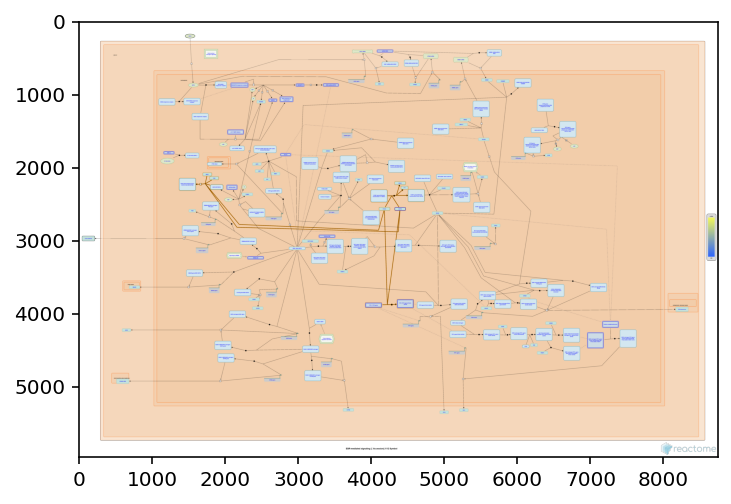

In [358]:
img = mpimg.imread('FOXA1 and GATA3 pathway.png') # open image
imgplot = plt.imshow(img)
plt.show() # show image


# Analyzing the Results
Looking at the pairwise sequence alignment, the scores for each sequences are high but since it's an end-to-end alignment (global), it is hard to say that FOXA1 and GATA3 are similar each other. RNA-seq shows the amount of expression of FOXA1 and GATA3 in endometrial and breast cancer cells.  All FPKM values of FOXA1 and GATA3 genes in breast cancer cells were higher than endometrial cancer cells. This shows that FOXA1 and GATA3 genes in breast cancer cells are more expressed than endometrial cancer cells.
By looking at the pathways of FOXA1 and GATA3 in ER-signaling pathway, we could conclude that the abundance of FOXA1 and GATA3 genes in breast cancer cells would activates CCND1 genes to create cylcin D1 to promote progression through the G1-S phase of the cell cycle.